In [90]:
import numpy as np
import pandas as pd
import random
# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 14, 7  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn
pd.options.display.float_format = '{:,.0f}'.format 


In [51]:
%run import_file.ipynb

Python version is 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Pandas version is 1.0.3
C:/Users/20193623/Desktop/DBL Data Challange/Vizualisations/topicairlinesentiment.csv
Unnamed: 0           int64
id_str               int64
KLM                  int64
British Airways      int64
American Air         int64
Lufthansa            int64
RyanAir              int64
sentiment            int64
Topic              float64
dtype: object


Please specify your DataFrame name:  df_top_sent_air


_id not found
Dtypes after transformation:
 Unnamed: 0           int64
id_str               Int64
KLM                  int64
British Airways      int64
American Air         int64
Lufthansa            int64
RyanAir              int64
sentiment            Int64
Topic              float64
dtype: object


In [52]:
def sentiment_topic_airline(airline : str , topic : str, df_plot ) -> ".jpg file" :
    """Saves a jpg of a histogram of the sentiment per airline about a topic.
    """
    
    topic_label =  {'baggage': '1',           # dictionary for decoding of variables in df
      'delay': '2',
      'pollute': '3',
      'cancel': '4',
      'service': '5',
      'ticket': '6',
      'corona': '7'}

    color_airline = { 'KLM' : '#00a1e4' ,    # colorcode for airline color used in plots 
          'British Airways' : '#A9A9A9' , 
          'American Air' : '#e92026' , 
          'Lufthansa': '#00235f' , 
          'RyanAir' : '#f1c933'}
    
    df = df_plot[df_plot[airline]==1]               # creates a data frame for the desired airline


    df_topic = df[df['Topic'] == int(topic_label[topic])]   #  creates a data frame for the desired topic and airline 

    df_topic['sentiment'].plot.hist(grid=True, bins=7, rwidth=0.9,        # plots the historgram with labels and title 
                   color=color_airline[airline])  # selects the color that applies to the airline from the dictionary 
    plt.title('Sentiment of tweets towards {} about {}'.format(airline, topic))
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    plt.xticks([-1,0,1])
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('Delay Sentiment/sentiment_{}_{}.jpg'.format(airline , topic))  # saves the plot to a folder in the same dir as the notebook 


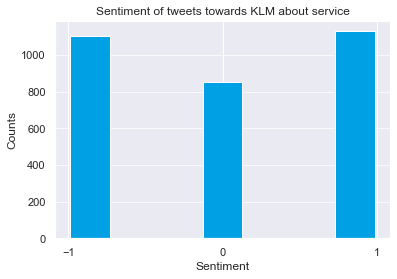

In [54]:
sentiment_topic_airline('KLM' , 'service' , df_top_sent_air)

In [81]:
def topic_airline_mean(airline: str ,topic: str,  df_in) :
    """get the mean value of sentiment from an airline per topic.
    """
    topic_label =  {'baggage': '1',           # dictionary for decoding of variables in df
      'delay': '2',
      'pollute': '3',
      'cancel': '4',
      'service': '5',
      'ticket': '6',
      'corona': '7'}
    
    df = df_in[df_in[airline]==1]               # creates a data frame for the desired airline


    df_topic = df[df['Topic'] == int(topic_label[topic])]   #  creates a data frame for the desired topic and airline 
    return df_topic['sentiment'].mean()


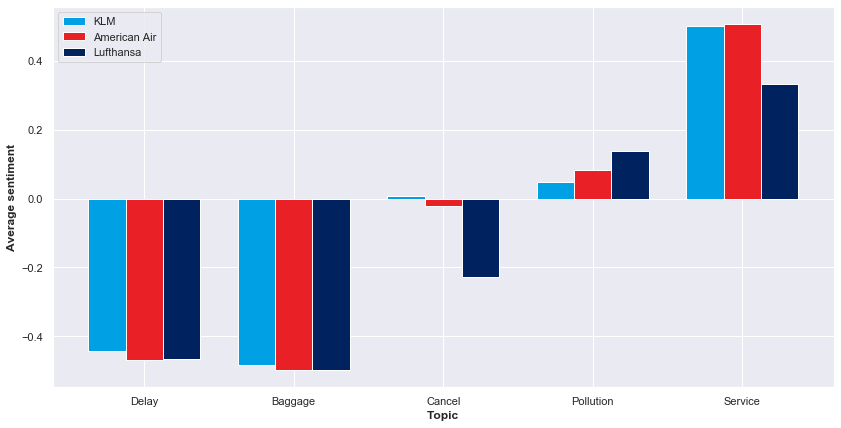

In [103]:

# set width of bar
barWidth = 0.25
 
color_airline = { 'KLM' : '#00a1e4' ,    # colorcode for airline color used in plots 
          'British Airways' : '#A9A9A9' , 
          'American Air' : '#e92026' , 
          'Lufthansa': '#00235f' , 
          'RyanAir' : '#f1c933'}



a = topic_airline_mean('KLM' , 'delay' , df_top_sent_air)         # ugly, I know but it works 
b = topic_airline_mean('KLM' , 'cancel' , df_top_sent_air) 
c = topic_airline_mean('KLM' , 'service' , df_top_sent_air) 
d = topic_airline_mean('KLM' , 'baggage' , df_top_sent_air) # gets the means of the sentiment scores using the means calculated by the function above 
e = topic_airline_mean('KLM' , 'pollute' , df_top_sent_air) 

f = topic_airline_mean('American Air' , 'delay' , df_top_sent_air) 
g = topic_airline_mean('American Air' , 'cancel' , df_top_sent_air) 
h = topic_airline_mean('American Air' , 'service' , df_top_sent_air) 
i = topic_airline_mean('American Air' , 'baggage' , df_top_sent_air) 
j = topic_airline_mean('American Air' , 'pollute' , df_top_sent_air)

k = topic_airline_mean('Lufthansa' , 'delay' , df_top_sent_air) 
l = topic_airline_mean('Lufthansa' , 'cancel' , df_top_sent_air)
m = topic_airline_mean('Lufthansa' , 'service' , df_top_sent_air)
n = topic_airline_mean('Lufthansa' , 'baggage' , df_top_sent_air)
o = topic_airline_mean('Lufthansa' , 'pollute' , df_top_sent_air) 
 
# set height of bar
bars1 = [a,b,c,d,e]    # formatting the sentiments average for plotting 
bars2 = [f,g,h,i,j]
bars3 = [k,l,m,n,o]
 
# Set position of bar on X axis
klm = np.arange(len(bars1))
aa = [x + barWidth for x in r1]
luf = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(klm, bars1, color='#00a1e4', width=barWidth, edgecolor='white', label='KLM')
plt.bar(aa, bars2, color='#e92026', width=barWidth, edgecolor='white', label='American Air')
plt.bar(luf, bars3, color='#00235f', width=barWidth, edgecolor='white', label='Lufthansa')
 
# Add xticks on the middle of the group bars
plt.xlabel('Topic', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Delay', 'Baggage', 'Cancel', 'Pollution', 'Service'])
plt.ylabel('Average sentiment', fontweight='bold')
# Create legend & Show graphic
plt.legend()
plt.savefig('mean_sent_per_airline_per_topic.jpg')
plt.show()